In [256]:
import numpy as np 
from skimage import io, exposure, transform, filters
import json 
import os 
import tifffile 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import ndimage, signal

In [393]:
# # Find the first maximum
# first_max_arg = np.argmax(signal)  # Argument of the first maximum
# first_max_value = signal[first_max_arg]  # Value of the first maximum

# # Mask the first maximum to find the second maximum
# signal_masked = np.copy(signal)
# signal_masked[max(0, first_max_arg - 1):min(len(signal), first_max_arg + 2)] = -np.inf  # Mask the first peak and its neighbors

# # Find the second maximum
# second_max_arg = np.argmax(signal_masked)  # Argument of the second maximum

def find_first2_maxima(signal): 
    # Find the first maximum
    first_max_arg = np.argmax(signal)  # Argument of the first maximum
    first_max_value = signal[first_max_arg]  # Value of the first maximum

    # Mask the first maximum to find the second maximum
    signal_masked = np.copy(signal)
    signal_masked[max(0, first_max_arg - 1):min(len(signal), first_max_arg + 2)] = -np.inf  # Mask the first peak and its neighbors

    # Find the second maximum
    second_max_arg = np.argmax(signal_masked)  # Argument of the second maximum
    return first_max_arg, second_max_arg

find_first2_maxima(radial_profile)

(1, 8)

In [394]:
128/8

16.0

Image is preprocessed in FIJI/ilastik to make analysis easier. 

In [281]:
# data=io.imread("G:\My Drive\Winter 2025\PHYS 238\Final Proj code\seg_medfilt_20.tif")
# from scipy.ndimage import rotate
# data_rotate = rotate(data, 15, reshape=False, mode='mirror')
# plt.imshow(data_rotate)
# tifffile.imsave('rotated_medfilt20.tif', data_rotate)

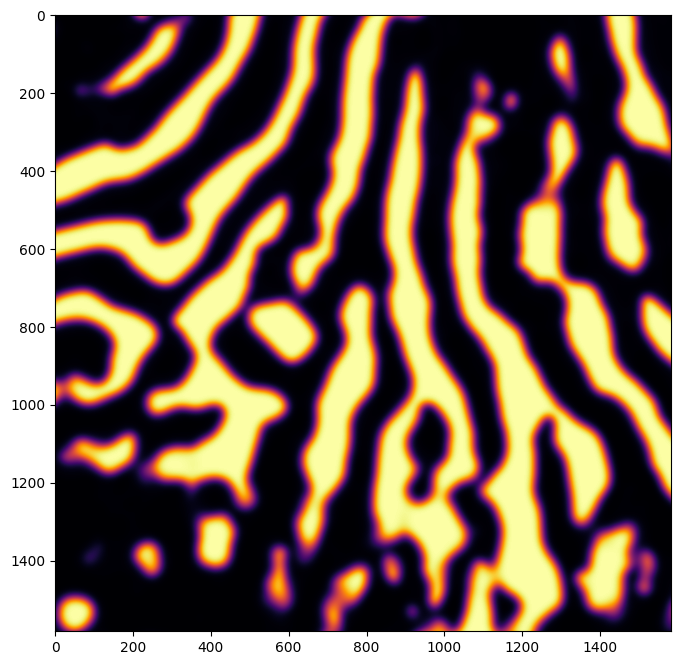

In [374]:
data = io.imread(r'G:\My Drive\Winter 2025\PHYS 238\Final Proj code\seg_medfilt20_gblur10_bullk.tif')
# data = transform.resize(data, (128, 128))
data = ndimage.gaussian_filter(data, 0)
data = data - np.mean(data) # remove dc component
plt.figure(figsize=(8,8))
plt.imshow(data, cmap='inferno')

Take the Fourier transform of the image.

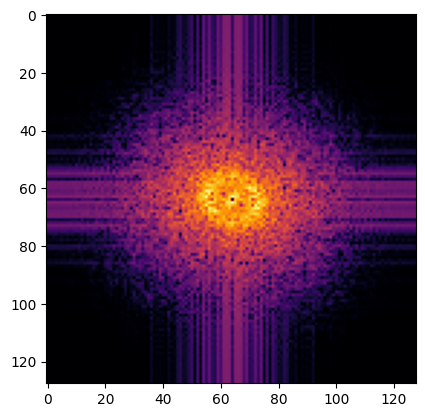

In [353]:
f_transform = np.fft.fft2(data)
f_transform_shifted = np.fft.fftshift(f_transform)
power_spectrum = np.abs(f_transform_shifted)**2

# displays the log to make contrast better
plt.imshow(np.log1p(power_spectrum), cmap='inferno')

We want to extract a power spectrum as a function of $r$ by doing radial averaging. 

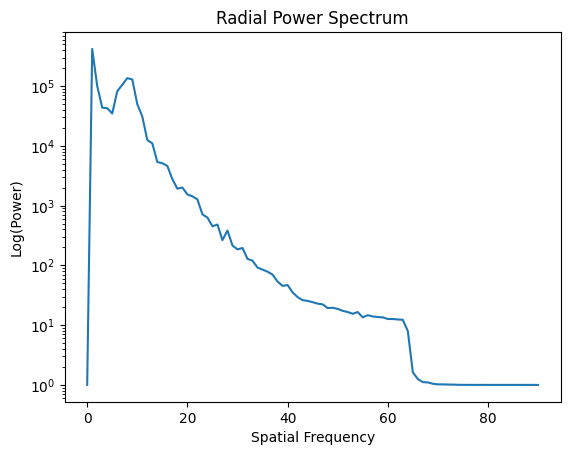

In [388]:
# radial averaging
# get x and y coordinate grids from image
# convert it to r(x, y) coordinate grid with shape x, y
y, x = np.indices(power_spectrum.shape)
center = np.array(power_spectrum.shape) // 2
r = np.sqrt((x - center[1])**2 + (y - center[0])**2)
r = r.astype(int)

# compute 1D radial profile 
radial_profile = np.bincount(r.ravel(), power_spectrum.ravel()) /np.bincount(r.ravel())

# find the dominant frequency
dominant_frequency = np.argmax(radial_profile)

# plot log of the radial profile

plt.plot(radial_profile+1)
plt.yscale('log')
plt.xlabel('Spatial Frequency')
plt.ylabel('Log(Power)')
plt.title(f'Radial Power Spectrum')
plt.savefig(os.path.join('data1', f'rps_ds{ds}.png'))
plt.show()

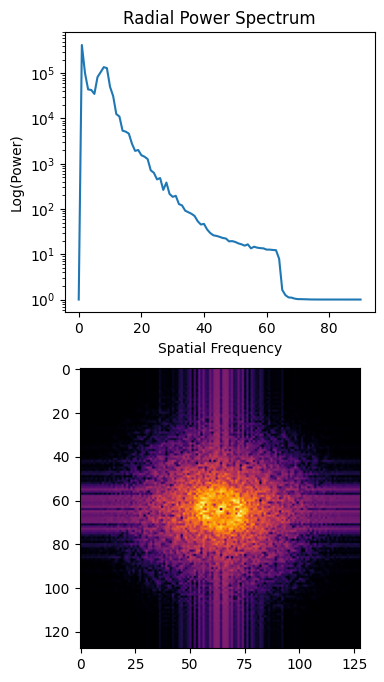

In [390]:
fig, (ax2, ax3) = plt.subplots(nrows=2, figsize=(4,8))
# ax1.imshow(curr_result, cmap='inferno')
ax2.plot(radial_profile+1)
ax2.set_yscale('log')
ax2.set_xlabel('Spatial Frequency')
ax2.set_ylabel('Log(Power)')
ax2.set_title(f'Radial Power Spectrum')
ax3.imshow(np.log1p(power_spectrum), cmap='inferno')

In [366]:
np.argmax(radial_profile[2:])

6

In [355]:
dominant_frequency

1

In [345]:
2*np.pi/dominant_frequency

1.0471975511965976

In [ ]:
# for ds in range(1, 20):    
#     data = io.imread('G:\My Drive\Winter 2025\PHYS 238\Final Proj code\seg_medfilt_20_bulk.tif')
#     data = data[::ds, ::ds]
#     f_transform = np.fft.fft2(data)
#     f_transform_shifted = np.fft.fftshift(f_transform)
#     power_spectrum = np.abs(f_transform_shifted)**2 
#     y, x = np.indices(power_spectrum.shape)
#     center = np.array(power_spectrum.shape) // 2
#     r = np.sqrt((x - center[1])**2 + (y - center[0])**2)
#     r = r.astype(int)

#     # compute 1D radial profile
#     # 
#     radial_profile = np.bincount(r.ravel(), power_spectrum.ravel()) / np.bincount(r.ravel())

#     # find the dominant frequency
#     dominant_frequency = np.argmax(radial_profile)

#     # plot log of the radial profile
#     plt.plot(np.log(radial_profile))
#     plt.xlabel('Spatial Frequency')
#     plt.ylabel('Log(Power)')
#     plt.title(f'Radial Power Spectrum (Downsampling: {ds})')
#     plt.savefig(os.path.join('data1', f'rps_ds{ds}.png'))
#     plt.close('all')